# Discrete Distributions

One of the best ways to describe a variable is to report the values in the dataset and how many times each value appears. This description is called the distribution of the variable.

The most common representation of a distribution is a graph that shows the frequency of each value.

In [1]:
#!pip install scipy
#!pip install matplotlib
#!pip install seaborn

In [2]:
#import numpy as np
#import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns; 
sns.set_style("whitegrid")

## Bernoulli Distribution

**Bernoulli distribution** has only two possible outcomes, `1` (success) and `0` (failure), in a single trial, for example, a coin toss.

In [3]:
from scipy.stats import bernoulli

In [4]:
# Tossing a coin 10 times
coins = bernoulli.rvs(size=10, p=0.5)
coins

array([1, 0, 0, 0, 0, 0, 1, 0, 1, 1])

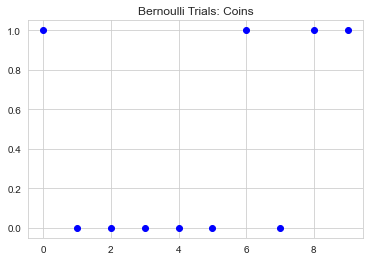

In [5]:
# Plotting coins
plt.plot(coins,'ob')
plt.title('Bernoulli Trials: Coins');

We can create a function to plot a Bernoulli Trial with different probabilities.

In [6]:
def plot_bernoulli_trials(size=10, prob=0.5):
    values = bernoulli.rvs(size=size,p=prob)
    plt.plot(values,'ob')
    title = 'Bernoulli Trials - Probability =' + str(prob)
    plt.title(title);

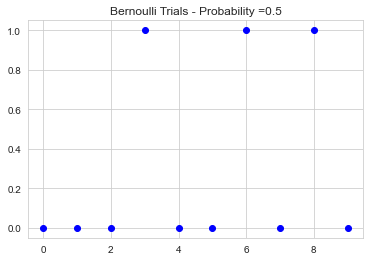

In [7]:
# The default values are 10 experiments with prob 0.5
plot_bernoulli_trials()

We can change the probability value.

If we set prob=0.8, most of the values will be 1.

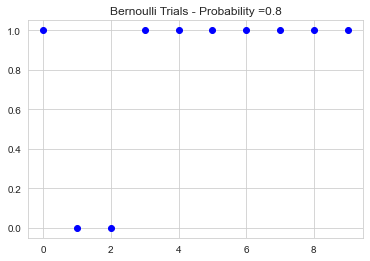

In [8]:
plot_bernoulli_trials(prob=0.8)

If we set prob=1, all the values will be 1.

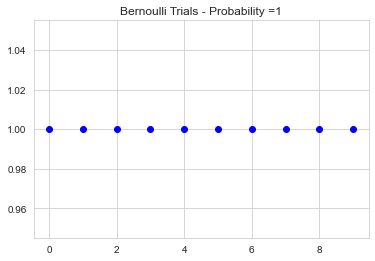

In [9]:
plot_bernoulli_trials(prob=1)

If we set prob=0.2, most of the values will be 0.

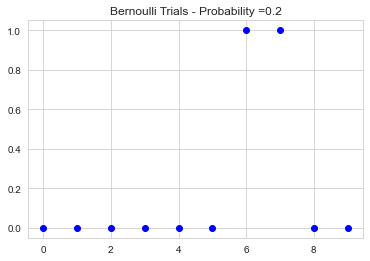

In [10]:
plot_bernoulli_trials(prob=0.2)

The result of `bernoulli.rvs()` is a NumPy array.

In [11]:
bern = bernoulli.rvs(size=10,p=0.8)
print(bern)
print(type(bern))

[1 1 1 1 0 0 1 1 0 0]
<class 'numpy.ndarray'>


You can calculate some central tendency measures:

In [12]:
print('The min value is  = %i' %(bern.min()))
print('The mean value is = %.2f' %(bern.mean()))
print('The max value is  = %i' %(bern.max()))

The min value is  = 0
The mean value is = 0.60
The max value is  = 1


And some variability measures:

In [13]:
print('The variance is           = %.2f' %(bern.var()))
print('The standard deviation is = %.2f' %(bern.std()))
print('The range is              = %.2f' %(bern.max()-bern.min()))

The variance is           = 0.24
The standard deviation is = 0.49
The range is              = 1.00


Let's generate 10000 values with Bernoulli distribution.

In [14]:
data_bern = bernoulli.rvs(size=10000, p=0.8)

We can count the number of successes (1) and failures (0), and plot the results.

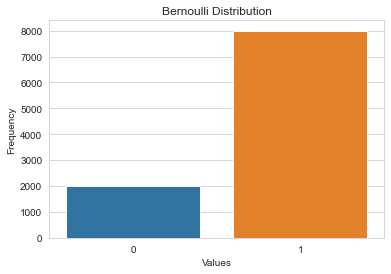

In [15]:
ax = sns.countplot(x=data_bern);
ax.set_title('Bernoulli Distribution')
ax.set(xlabel='Values', ylabel='Frequency');

Tossing a coin 10000 times:

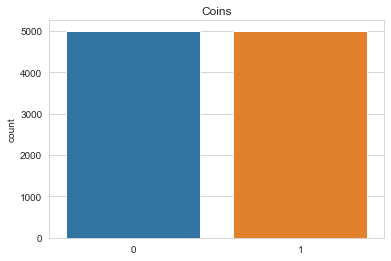

In [16]:
coins  = bernoulli.rvs(size=10000,p=0.5)
ax = sns.countplot(x=coins);
ax.set_title('Coins');

## Binomial Distribution

**Binomial Distribution** is a distribution where only two outcomes are possible, such as success or failure, gain or loss, win or lose, and the probability of success and failure is the same for all the trials.

In [17]:
from scipy.stats import binom

Tossing a coin `n=10` times with probability `p=0.5`. The parameter `size` is the number of times to repeat the trial.

In [18]:
binom.rvs(n=10, p=0.5, size=1)

array([5])

Repeating the experiment 5 times:

In [19]:
binom.rvs(n=10, p=0.5, size=5)

array([5, 3, 4, 4, 7])

Repeating the experiment 10 times and getting the results in the variable `bnm`.

In [20]:
bnm = binom.rvs(n=10, p=0.5, size=10)
print(bnm)
print(type(bnm))

[4 5 7 3 4 7 3 4 6 3]
<class 'numpy.ndarray'>


`bnm` is a NumPy array, so you can calculate some central tendency statistics.

In [21]:
print('The min value is  = %i' %(bnm.min()))
print('The mean value is = %.2f' %(bnm.mean()))
print('The max value is  = %i' %(bnm.max()))

The min value is  = 3
The mean value is = 4.60
The max value is  = 7


And some variability measures:

In [22]:
print('The variance is           = %.2f' %(bnm.var()))
print('The standard deviation is = %.2f' %(bnm.std()))
print('The range is              = %.2f' %(bnm.max()-bnm.min()))

The variance is           = 2.24
The standard deviation is = 1.50
The range is              = 4.00


Let's create a function that generates values from a binomial distribution, and plot them.

In [23]:
def plot_binomial(n=10, prob=0.5, size=1000):
    data_binom = binom.rvs(n=n, p=prob, size=size)
    ax = sns.displot(data_binom, kde=False, color='darkgreen')
    ax.set(title='Binomial Distribution');

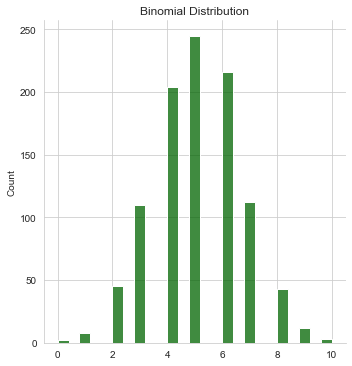

In [24]:
plot_binomial()

As you can see, the graph is symmetric.

Let's generate 10000 cases using `p=0.8`

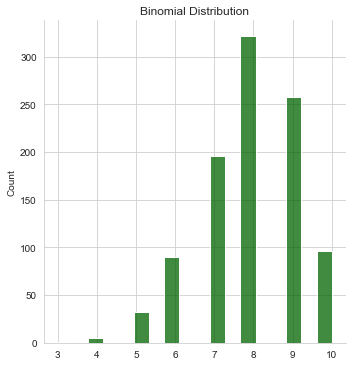

In [25]:
plot_binomial(prob=0.8)

Since the probability of success was greater than 0.5 the distribution is skewed towards the right side.

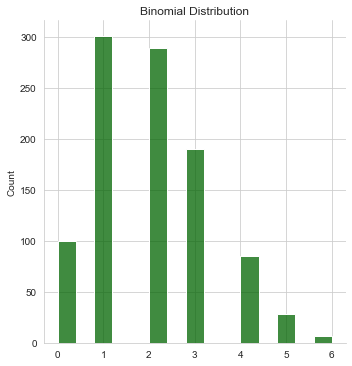

In [26]:
plot_binomial(prob=0.2)

Since the probability of success was lesser than 0.5 the distribution is skewed towards the left side.

### Calculating probabilities

**Example**: It is known that 5% of adults who take a certain medication experience negative side effects. We have a random sample of 100 patients, and we want to calculate the probability that:
- a) 5 patients experience side effects
- b) 5 patients or less experience side effects
- c) more than 5 patients experience side effects 
- d) between 1 and 10 patientes experience side efects

p = 0.05 - probability of a patient experience side effects

n = 100 - sample size

a) 5 patients experience side effects

k = 5 Let's use binom.pmf (probability mass function)

In [27]:
print('Prob(5 patients with side effects) = %.4f' % binom.pmf(k=5, n=100, p=0.05))

Prob(5 patients with side effects) = 0.1800


b) 5 patients or less experience side effects

Let's use binom.cdf (cumulative distribution function)

In [28]:
print('Prob(5 patients or less experience side effects) = %.4f' % binom.cdf(k=5, n=100, p=0.05))

Prob(5 patients or less experience side effects) = 0.6160


c) more than 5 patients experience side effects 

In [29]:
print('Prob(more than 5 patients experience side effects) = %.4f' %(1-binom.cdf(k=5, n=100, p=0.05)))

Prob(more than 5 patients experience side effects) = 0.3840


d) between 1 and 10 patientes experience side efects

In [30]:
print('Prob(between 1 and 10 patientes experience side efects) = %.4f' 
       %(binom.cdf(k=10, n=100, p=0.05)-binom.cdf(k=0, n=100, p=0.05)))

Prob(between 1 and 10 patientes experience side efects) = 0.9826


You could also calculate it this way:

In [31]:
pr = 0
for k in range(1,11):
    pr = pr + binom.pmf(k=k, n=100, p=0.05)
print('Prob(between 1 and 10 patientes experience side efects) = %.4f' %pr)    

Prob(between 1 and 10 patientes experience side efects) = 0.9826


## Poisson Distribution

**Poisson** random variable is typically used to model the number of times an event happened in a time interval.

**Poisson distribution** is described in terms of the rate (μ) at which the events happen.

μ is the average number of successes occurring in a given time interval.

The mean and the variance of the Poisson distribution are both equal to μ

In [32]:
from scipy.stats import poisson

In [33]:
poisson.rvs(mu=1,size=10)

array([0, 2, 1, 2, 2, 2, 0, 0, 2, 1])

In [34]:
poisson.rvs(mu=3,size=10)

array([4, 2, 5, 1, 2, 2, 1, 5, 2, 4])

In [35]:
poisson.rvs(mu=10,size=10)

array([ 9, 13, 11, 12, 12, 10, 12, 12,  7,  7])

In [36]:
pss =  poisson.rvs(mu=2,size=10)
print(pss)
print(type(pss))

[1 4 2 3 2 4 4 0 1 2]
<class 'numpy.ndarray'>


`pss` is a numpy array, so you can calculate some central tendency statistics:

In [37]:
print('The min value is  = %i' %(pss.min()))
print('The mean value is = %.2f' %(pss.mean()))
print('The max value is  = %i' %(pss.max()))

The min value is  = 0
The mean value is = 2.30
The max value is  = 4


And some variability measures:

In [38]:
print('The variance is           = %.2f' %(pss.var()))
print('The standard deviation is = %.2f' %(pss.std()))
print('The range is              = %.2f' %(pss.max()-pss.min()))

The variance is           = 1.81
The standard deviation is = 1.35
The range is              = 4.00


Let's define a function for plotting Poisson Distributions

In [39]:
def plot_Poisson(mu=2, size=10):
    data_poisson = poisson.rvs(mu=mu, size=size)
    ax = sns.displot(data_poisson, kde=False, color='darkred')
    ax.set(title='Poisson Distribution');

Let's generate 10000 values with Poisson distribution, and let's graph them.

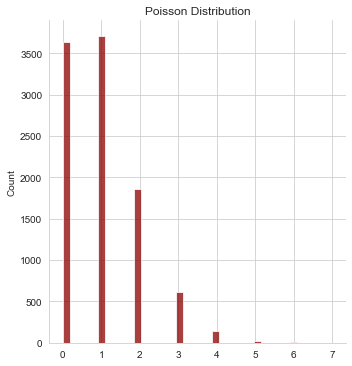

In [40]:
plot_Poisson(mu=1, size=10000)

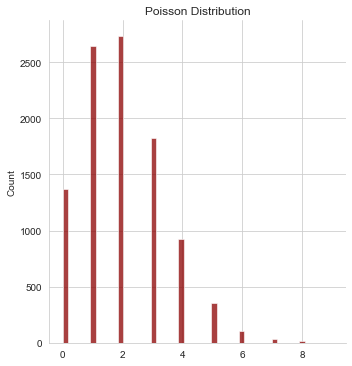

In [41]:
plot_Poisson(mu=2, size=10000)

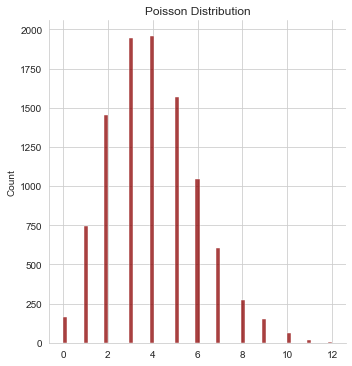

In [42]:
plot_Poisson(mu=4, size=10000)

Reference:
- Unpingco, J. (2019) Python for Probability, Statistics, and Machine Learning, USA: Springer, chapter 2